# Project Motivation

For this project, I was interestested in using Stack Overflow data from 2017 to better understand:

1. How active are developers on Stack Overflow?
2. Is the developer’s salary related to their activity level on Stack Overflow?
3. Is the status of the user account related to user behavior? Can it be further utilized?

# A Look at the Data

In order to get a better understanding of the data, let's take a look at some of the characteristics of the dataset.

First, let's read in the data and necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
df1 = pd.read_csv('./survey_results_public.csv')
df1.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df1.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


The data in the `survey_results_public.csv` is the result of the survey, with a total of 154 columns. Save it in `df1`.

In [4]:
df2 = pd.read_csv('./survey_results_schema.csv')
df2.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


The file `survey_results_schema.csv` provides survey schema, i.e., the questions that correspond to each column name. Save it in `df2`.

# Question1: How active are developers on Stack Overflow?

## 1. Gather necessary data
### 1.1 Find related fields
First, I need to gather necessary data to answer this questions. Let's see which columns in the `df2` contain 'StackOverflow'.

In [5]:
# Define a function to find the column we are interested in.
def find_related_columns(df, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    look_for - a string you want to search for in each column of df
    
    OUTPUT:
    related_columns - a list of columns containing the string you want to find
    '''
    related_columns = []
    for col in df.Column:
        if look_for in col:
            related_columns.append(col)
    return related_columns


# find columns contain StackOverflow
columns_contain_StackOverflow = find_related_columns(df2, 'StackOverflow')

### 1.2 Select necessary fields
Among these columns, the fields that appear to be related to the developer's activity on the website are `StackOverflowDescribes`, `StackOverflowFoundAnswer`, `StackOverflowCopiedCode`, `StackOverflowJobListing`, `StackOverflowCompanyPage`, `StackOverflowJobSearch`, `StackOverflowNewQuestion`, `StackOverflowAnswer` and `StackOverflowMetaChat`. 

Let's look at the description of these fields in the survey schema.

In [6]:
columns_contain_StackOverflow2 = ['StackOverflowDescribes', 'StackOverflowFoundAnswer', 
                                  'StackOverflowCopiedCode', 'StackOverflowJobListing', 
                                  'StackOverflowCompanyPage', 'StackOverflowJobSearch', 
                                  'StackOverflowNewQuestion', 'StackOverflowAnswer', 
                                  'StackOverflowMetaChat']

# Look at the questions for these columns in the survey.
for col in columns_contain_StackOverflow2:
    print(col)
    print(list(df2.loc[df2['Column'] == col]['Question']))

StackOverflowDescribes
['Which of the following best describes you?']
StackOverflowFoundAnswer
['Over the last three months, approximately how often have you done each of the following on Stack Overflow? Found an answer that solved my coding problem']
StackOverflowCopiedCode
['Over the last three months, approximately how often have you done each of the following on Stack Overflow? Copied a code example and pasted it into my codebase']
StackOverflowJobListing
['Over the last three months, approximately how often have you done each of the following on Stack Overflow? Seen a job listing I was interested in']
StackOverflowCompanyPage
['Over the last three months, approximately how often have you done each of the following on Stack Overflow? Researched a potential employer by visiting its company page']
StackOverflowJobSearch
['Over the last three months, approximately how often have you done each of the following on Stack Overflow? Searched for jobs']
StackOverflowNewQuestion
['Over the l

After confirmation, I selected the data of these columns as the research object of Question 1. 
## 2. Handle categorical and missing data
Let's look at column `StackOverflowDescribes` to see how many respondents have registered and filled out their personal information on StackOverflow.

In [7]:
Describes = df1.StackOverflowDescribes.value_counts(dropna=False).reset_index()
Describes.rename(columns={'StackOverflowDescribes': 'count'}, inplace=True)
Describes['perc'] = Describes['count']/np.sum(Describes['count'])
Describes

,index,count,perc
0,"I have a login for Stack Overflow, but haven't...",19696,0.383250
1,NaN,14460,0.281367
2,I have created a CV or Developer Story on Stac...,8906,0.173295
3,"I've visited Stack Overflow, but haven't logge...",8012,0.155900
4,I'd never heard of Stack Overflow before today,196,0.003814
5,"I've heard of Stack Overflow, but have never v...",122,0.002374


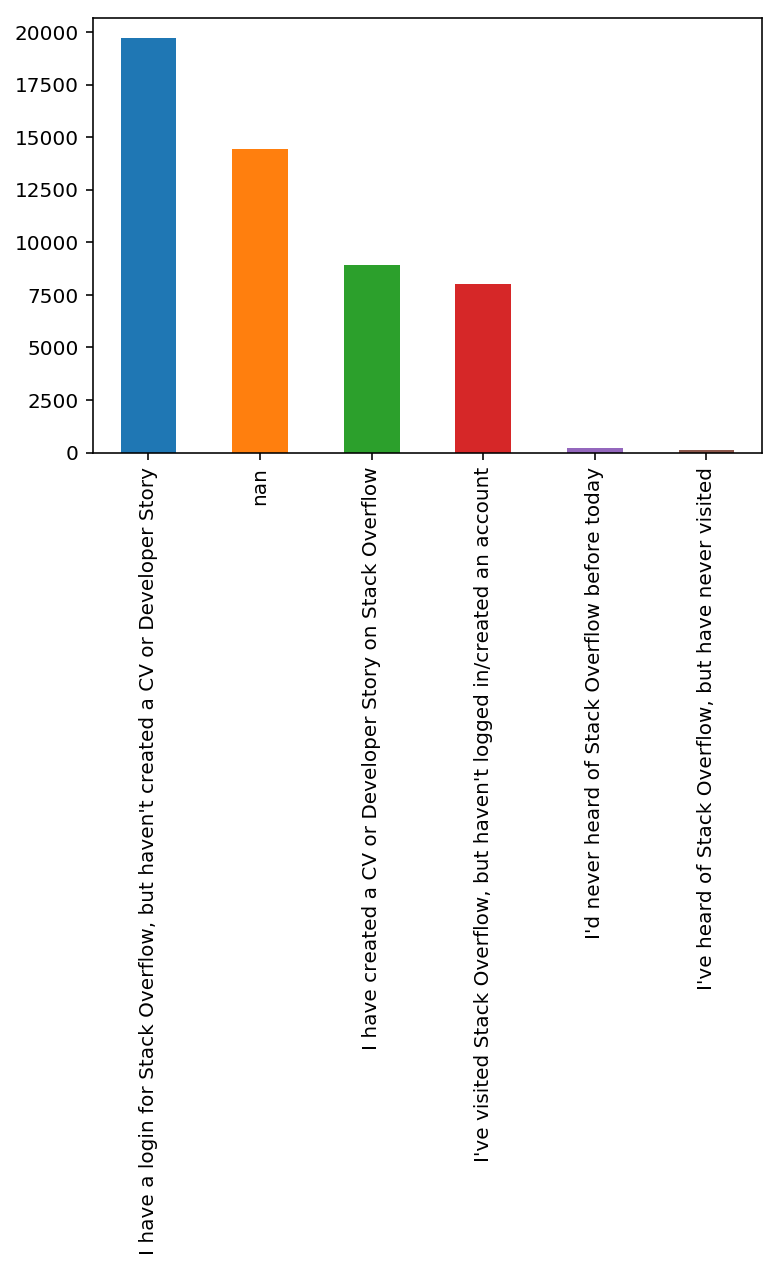

In [8]:
df1.StackOverflowDescribes.value_counts(dropna=False).plot(kind='bar')

About 38% of respondents have a login for Stack Overflow, but haven't created a CV or Developer Story. And 17% of respondents have created a CV or Developer Story on Stack Overflow. Usually, as long as you have registered an account, you will be treated as a user of the website. This part accounts for 56% of the respondents. 

In addition, approximately 28% of the data is missing.

But registration is only the first step. Next we will study the user's activity level on StackOverflow. The survey collected the frequency of several user activities, including finding answers, copying code, searching job, asking questions, answering questions, and participating in discussions.

In [9]:
columns_activity = ['StackOverflowFoundAnswer', 'StackOverflowCopiedCode', 
                    'StackOverflowJobListing', 'StackOverflowCompanyPage', 
                    'StackOverflowJobSearch', 'StackOverflowNewQuestion', 
                    'StackOverflowAnswer', 'StackOverflowMetaChat']

data_type = {}
for col in columns_activity:
    data_type[col] = df1[col].unique()

data_type

{'StackOverflowAnswer': array(['Several times', 'At least once each day', nan,
        "Haven't done at all", 'Once or twice', 'At least once each week'],
       dtype=object),
 'StackOverflowCompanyPage': array(["Haven't done at all", 'Once or twice', 'Several times', nan,
        'At least once each week', 'At least once each day'], dtype=object),
 'StackOverflowCopiedCode': array(["Haven't done at all", 'Several times', nan, 'Once or twice',
        'At least once each week', 'At least once each day'], dtype=object),
 'StackOverflowFoundAnswer': array(['At least once each week', 'Several times', 'Once or twice', nan,
        'At least once each day', "Haven't done at all"], dtype=object),
 'StackOverflowJobListing': array(['Once or twice', "Haven't done at all", 'At least once each week',
        nan, 'Several times', 'At least once each day'], dtype=object),
 'StackOverflowJobSearch': array(["Haven't done at all", 'Once or twice', 'At least once each week',
        nan, 'Several ti

According to `data_type`, we know that:
1. The data is categorical data;
2. Each column has missing data.

The data needs to be processed first. 
1. Replace the frequency with a number. 

The numbers represent activity level and are divided into 0, 1, 2, 3 and 4. It is not a true frequency, but the larger the value, the higher the frequency.
2. Replace the missing value with 0.

#### There are two reasons for choosing this method. 
First, the respondent did not answer the question most likely because he did not use StackOverflow. Second, I don't want to overestimate the activeness of the respondents.

In [10]:
replace_dict = {"Haven't done at all": 0, "Once or twice": 1, "Several times": 2, 
                "At least once each week": 3, "At least once each day": 4}

activity_df = df1[columns_activity].copy()
for col in columns_activity:
    # activity_df[col] = df1[col].replace(replace_dict)
    activity_df[col].replace(replace_dict, inplace=True)
activity_df.fillna(0, axis=0, inplace=True)    
activity_df[columns_activity].head()

,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat
0,3.0,0.0,1.0,0.0,0.0,2.0,2.0,1.0
1,2.0,2.0,1.0,1.0,1.0,0.0,2.0,3.0
2,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0
3,3.0,2.0,3.0,2.0,3.0,2.0,4.0,4.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3. Analyze and Visualize
The behavior of respondents on StackOverflow in the survey results can be divided into three categories:
1. Find and use existing code-related information(`StackOverflowFoundAnswer` and `StackOverflowCopiedCode`)
2. Related to finding a job(`StackOverflowJobListing`, `StackOverflowCompanyPage` and `StackOverflowJobSearch`)
3. Content creation(`StackOverflowNewQuestion`, `StackOverflowAnswer` and `StackOverflowMetaChat`)

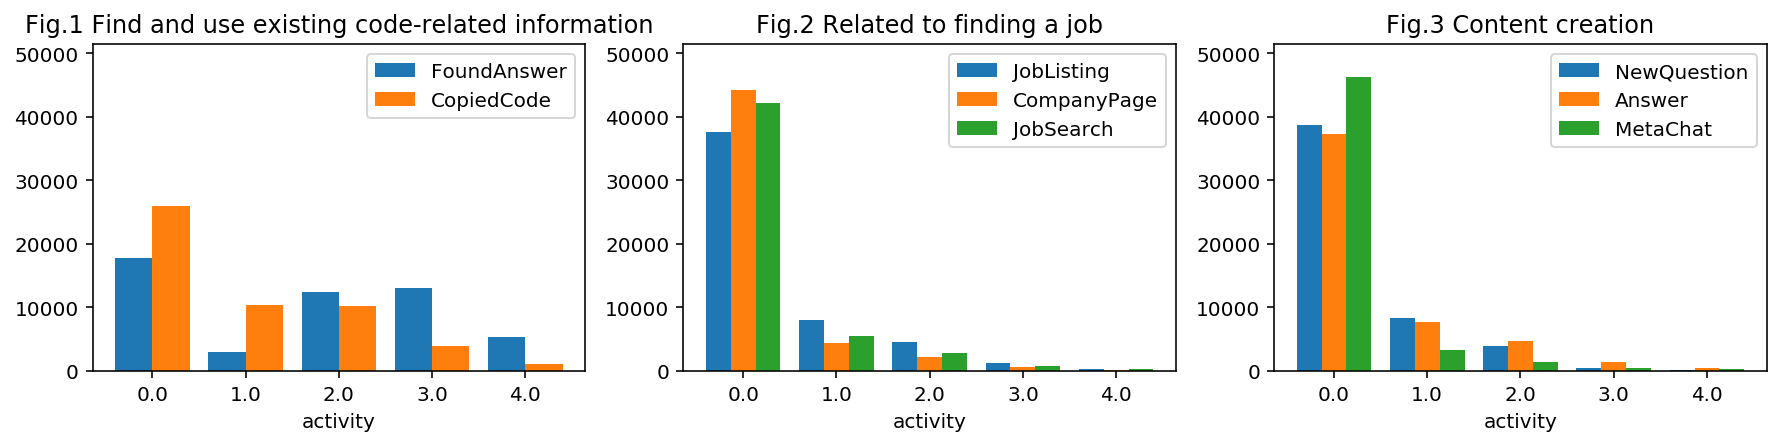

In [11]:
# Draw three histograms of the three types of behavioral activity .
plt.figure(1, figsize=[15,3])
plt.subplot(131)
plt.hist(activity_df[columns_activity[0:2]], bins=5,range=[-0.5, 4.5])
plt.ylim([0,51392])
plt.xlabel('activity')
plt.title('Fig.1 Find and use existing code-related information')
plt.legend(['FoundAnswer', 'CopiedCode'])
plt.subplot(132)
plt.hist(activity_df[columns_activity[2:5]], bins=5,range=[-0.5, 4.5])
plt.ylim([0,51392])
plt.xlabel('activity')
plt.title('Fig.2 Related to finding a job')
plt.legend(['JobListing', 'CompanyPage', 'JobSearch'])
plt.subplot(133)
plt.hist(activity_df[columns_activity[5:8]], bins=5,range=[-0.5, 4.5])
plt.ylim([0,51392])
plt.xlabel('activity')
plt.title('Fig.3 Content creation')
plt.legend(['NewQuestion', 'Answer', 'MetaChat'])
plt.show()

### findings
#### 1. Comparison of the proportion of users who have never used StackOverflow in the past 3 months.
As you can see from Figure 1, the percentage of respondents who did not find an answer or copy code on StackOverflow in the past 3 months were 34% and 50%, respectively. Figures 2 and 3 show that most respondents (about 80%) have not found a job or involved in content creation on StackOverflow for the past 3 months. It shows that the code-related information on StackOverflow has attracted more users.
#### 2. The activity of users who have used StackOverflow in the past 3 months
In general, the lower the percentage of users who are more active on the site. The activity of the second and third types of behaviors are consistent with this law. However, the percentage of users who have found answers to solve code problems at least once a week on StackOverflow in the past three months is the highest. In other words, the proportion of users with medium activity is higher than that of low activity. This shows that many users have developed the habit of finding answers on StackOverflow. It also shows that the website does a good job of providing good quality code-related information.
# Question2: Is the developer’s salary related to their activity level on Stack Overflow?

## 1. Gather necessary data
Adding the `Salary` column in `df1` to `activity_df` is what we need for the question 2.

In [12]:
# Adding the Salary column in df1 to activity_df
activity_df['Salary'] = df1['Salary']
activity_df.head()

,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,Salary
0,3.0,0.0,1.0,0.0,0.0,2.0,2.0,1.0,NaN
1,2.0,2.0,1.0,1.0,1.0,0.0,2.0,3.0,NaN
2,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,113750.0
3,3.0,2.0,3.0,2.0,3.0,2.0,4.0,4.0,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


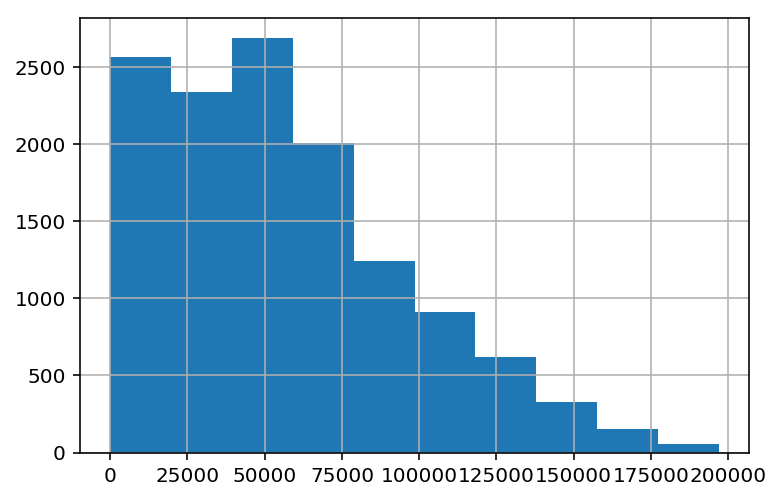

In [13]:
# Draw a histogram of the salary.
activity_df['Salary'].hist()

The figure above shows the distribution of respondents' salary.

## 2. Handle missing data

In [14]:
# View the proportion of missing values and the number of rows without missing data in the column of Salary
print(activity_df['Salary'].isnull().mean())
print(activity_df['Salary'].notnull().sum())

0.7491632938978829
12891


Currently, 75% of the values in the `Salary` column of `activity_df` are missing. I will remove these rows first, leaving 12891 rows.

In [15]:
# Delete rows with missing values in the Salary column.
activity_dropna = activity_df.dropna()
activity_dropna.describe()

,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,Salary
count,12891.000000,12891.000000,12891.000000,12891.000000,12891.000000,12891.000000,12891.000000,12891.000000,12891.000000
mean,2.337367,1.173920,0.624777,0.310682,0.416182,0.433481,0.604996,0.190676,56298.480641
std,1.152654,1.069431,0.893040,0.679908,0.776007,0.707365,0.897140,0.565995,39880.905277
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26440.371839
50%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50000.000000
75%,3.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,80000.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,197000.000000


## 3. Analyze and Visualize

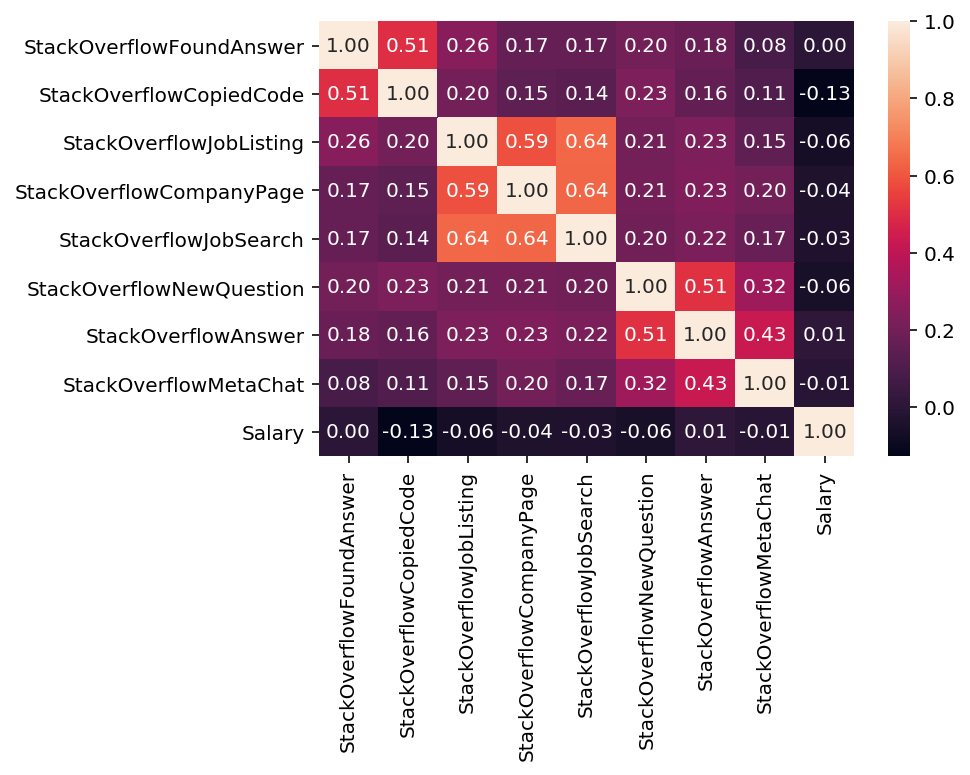

In [16]:
sns.heatmap(activity_dropna.corr(), annot=True, fmt=".2f")

My initial guess was that users who were more active on StackOverflow (such as contributing a lot of good answers) might have a higher code level. The salary of a high level of developers is usually higher. Therefore, the respondent's salary may have some relevance to its activity on StackOverflow.
### findings
However, through the correlation analysis of the survey results, I found that my conjecture is not valid. The correlation coefficient between salary and activity is small (between -0.13 and 0.01).

#### Originally I wanted to build a model that predicted the salary of the user by its activity on StackOverflow. But this idea is too idealistic and cannot be done.

But the correlation within the three types of behavior is relatively high. For example, the correlation coefficient for proposing new questions and answering questions is 0.51, and the correlation coefficient with Meta is 0.31. Users who like to ask questions on StackOverflow are more likely to answer questions and participate in community discussions on meta or in chat.

I proposed a new indicator, the active index, which is defined as the sum of the activity of the eight behaviors. The maximum value of the respondent's activity index is 32. Respondents with an activity index ranging from 3 to 6 accounted for the highest proportion.

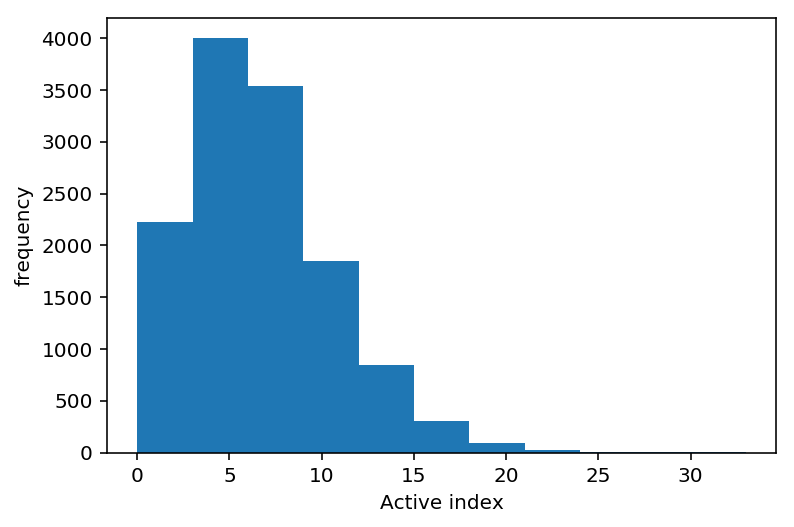

In [17]:
activity_dropna2 = activity_dropna.copy()
activity_dropna2['Active index'] = activity_dropna[columns_activity].sum(axis=1)
plt.hist(activity_dropna2['Active index'], bins=11, range=(0,33))
plt.xlabel('Active index')
plt.ylabel('frequency')
plt.show()

I plotted a scatter plot of the activity index and salary. It can be seen from the figure that they do not show a clear linear relationship.

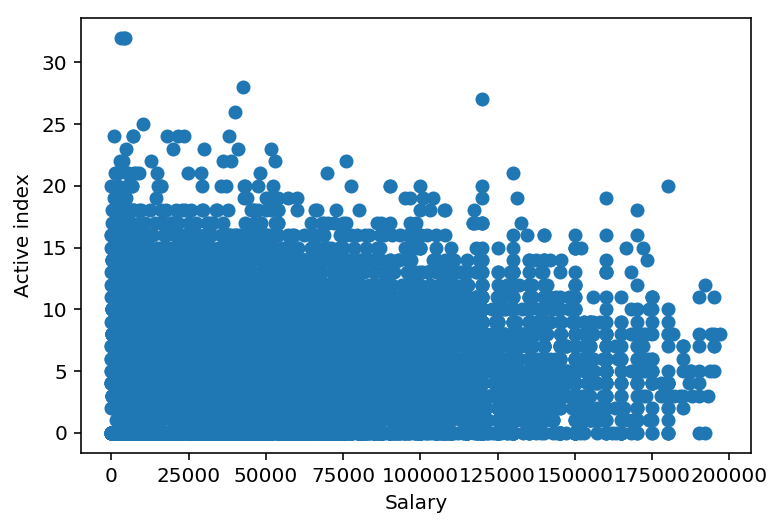

In [18]:
plt.scatter(activity_dropna2['Salary'], activity_dropna2['Active index'])
plt.xlabel('Salary')
plt.ylabel('Active index')
plt.show()

# Question3: Is the status of the user account related to user behavior? Can it be further utilized?
## 1. Gather necessary data
Through the `StackOverflowDescribes` column in `df1`, we can classify the user account states that have used Stack Overflow into three categories:
1. I've visited Stack Overflow, but haven't logged in/created an account
2. I have a login for Stack Overflow, but haven't created a CV or Developer Story
3. I have created a CV or Developer Story on Stack Overflow

In order to facilitate the expression, according to the above serial number, they are respectively referred to as the first class, the second class and the third class of users.

And adding the `StackOverflowDescribes` column in `df1` to `activity_df` is what we need for the third problem.

In [19]:
activity_df2 = activity_df.copy()
activity_df2['Describes'] = df1['StackOverflowDescribes']
activity_df2.drop('Salary', axis = 1, inplace=True)
activity_df2.head()

,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,Describes
0,3.0,0.0,1.0,0.0,0.0,2.0,2.0,1.0,I have created a CV or Developer Story on Stac...
1,2.0,2.0,1.0,1.0,1.0,0.0,2.0,3.0,I have created a CV or Developer Story on Stac...
2,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,I have created a CV or Developer Story on Stac...
3,3.0,2.0,3.0,2.0,3.0,2.0,4.0,4.0,I have created a CV or Developer Story on Stac...
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


## 2. Handle missing data

In [20]:
print(activity_df2['Describes'].isnull().mean())
print(activity_df2['Describes'].notnull().sum())

0.2813667496886675
36932


Only 28% of the values in the `Describes` column are missing, and the ratio is not too high. I chose to delete rows with missing values because there is no suitable way to replace missing values.

In [21]:
activity_df2.dropna(inplace=True)

I filter the data of the three types of respondents according to the status of the account. The average of the activity levels of the various behaviors is then calculated separately.

In [22]:
Describes_list = activity_df2['Describes'].unique()

In [23]:
activity_avg = []
for des in Describes_list:
    list1 = []
    for col in columns_activity:
        list1.append(activity_df2[activity_df2['Describes'] == des][col].mean())
    activity_avg.append(list1)

## 3. Analyze and Visualize
Finally, the activity curve of the three types of respondents is drawn.

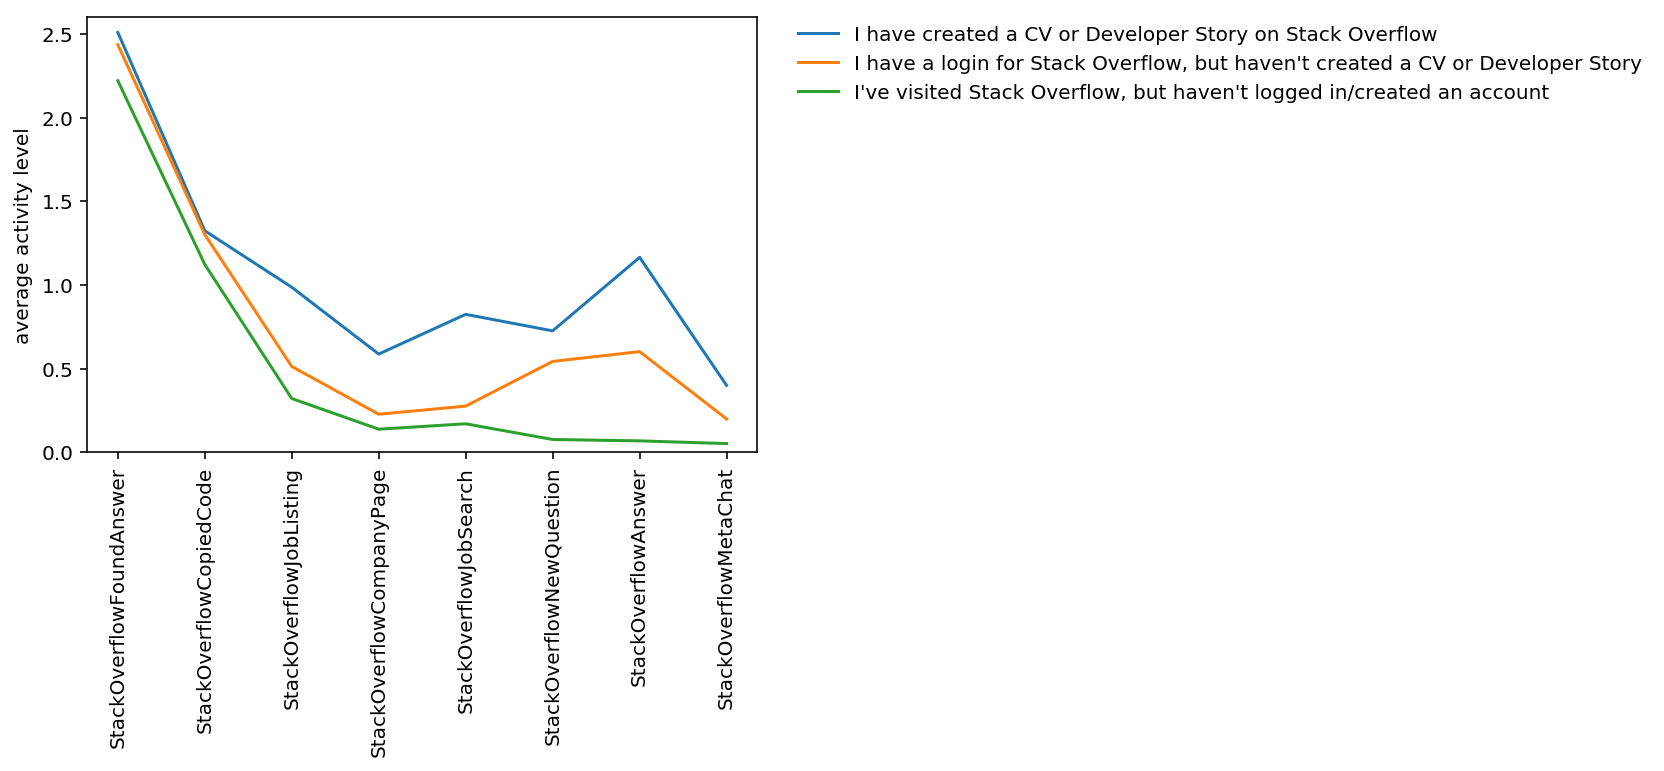

In [24]:
for i in range(len(activity_avg[0:3])):
    plt.plot(list(range(len(columns_activity))), activity_avg[i], label=Describes_list[i])
plt.legend(frameon=False, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,ncol=1)
plt.xticks(list(range(len(columns_activity))), columns_activity, rotation=90)
plt.ylabel('average activity level')
plt.ylim([0, 2.6])
plt.show()

### findings
1. As can be seen from the above figure, regardless of whether the user has registered an account, the frequency of finding answers and copying codes on the website is not much different.
2. The second class and the third class of users are not active in the behavior related to job hunting. However, the activity of the first type of users is significantly higher.
3. The frequency of the third class users participating in content creation is very low. The second class of users are more active. The first class of users is the most active.

According to the second point, it can be speculated that when a user's account creates a CV or developer story, he is more likely to find a job on Stack Overflow. This provides an idea for ad serving to show users some job ads that match their profile.

The main findings of the code can be found at the post available [here](https://medium.com/@mohancrskls/are-developers-salaries-influenced-by-their-activity-on-stack-overflow-8dc099b2acd0).